In [1]:
import sys
import os
import argparse

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

#tesnorflow
import tensorflow as tf
from tensorflow import keras
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model

import keras
from keras import models
from keras.models import Model
from keras.models import Sequential

# Deep Learning - Keras - Layers

from tensorflow.keras.layers  import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D, DepthwiseConv2D


# Deep Learning - Keras - Pretrained Models
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3

# Deep Learning - Keras - Model Parameters and Evaluation Metrics

from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Deep Learning - Keras - Visualisation

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# from keras.wrappers.scikit_learn import KerasClassifier

from keras import backend as K

# Deep Learning - TensorFlow

import tensorflow as tf

# Graph/ Visualization

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image

import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline


In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow.keras.models import load_model
 
# load model
model = load_model('C:/DUAEFATIMA/batchsizes_experiments/128_batchsize/mobilenetv2_128.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 32)                40992     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 8

In [3]:
y_test_1=[]
test_path_1='C:/DUAEFATIMA/test_merge'

for i in os.listdir(test_path_1):
  #print(i)
  if "A" in i:
    y_test_1.append(0)

#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "B" in i:
    y_test_1.append(1)
#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "C" in i:
    y_test_1.append(2)
#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "D" in i:
    y_test_1.append(3)
#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "E" in i:
    y_test_1.append(4)
#print(y_test_1)
print(len(y_test_1))
###############################


4923


In [4]:
#samreen editt

start = datetime.datetime.now()

y_pred_1=[]
ds_eye_dir = "C:/DUAEFATIMA/experiments/eyePACS/eyepacs_augmented"
#Generating a dataset
ds_eye = tf.keras.preprocessing.image_dataset_from_directory(ds_eye_dir)
test_path_1='C:/DUAEFATIMA/test_merge'
for i in os.listdir(test_path_1):
  print(i)
  img=image.load_img(test_path_1+'//'+i,target_size=(224,224))
  #img = tf.keras.utils.load_img(image_path, target_size=(224,224))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1,224,224,3)
  label = model.predict(img)
  # print("Predicted score",label)
   #print("Predicted Clas, ls (0 - Cars , 1- Planes): ", label[1][1])
  p=np.argmax(label)
  print("Predicted ",ds_eye.class_names[p])
  #print([p])
  y_pred_1.append(p)


end = datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)
print(len(y_pred_1))




Found 49006 files belonging to 5 classes.
classA (1).jpeg
1/1 [==============================] - 1s 1s/step
Predicted  level_0
classA (10).jpeg
1/1 [==============================] - 0s 69ms/step
Predicted  level_0
classA (100).jpeg
1/1 [==============================] - 0s 74ms/step
Predicted  level_0
classA (1000).jpeg
1/1 [==============================] - 0s 87ms/step
Predicted  level_0
classA (1001).jpeg
1/1 [==============================] - 0s 85ms/step
Predicted  level_0
classA (1002).jpeg
1/1 [==============================] - 0s 86ms/step
Predicted  level_0
classA (1003).jpeg
1/1 [==============================] - 0s 70ms/step
Predicted  level_0
classA (1004).jpeg
1/1 [==============================] - 0s 82ms/step
Predicted  level_0
classA (1005).jpeg
1/1 [==============================] - 0s 90ms/step
Predicted  level_0
classA (1006).jpeg
1/1 [==============================] - 0s 87ms/step
Predicted  level_0
classA (1007).jpeg
1/1 [==============================] - 0s 84ms/

4923
4923


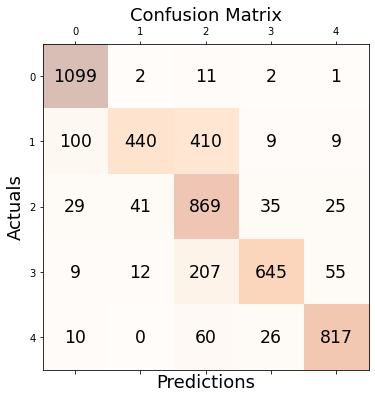

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix_1
# print(y_test_1)
# print(y_pred_1)
print(len(y_test_1))
print(len(y_pred_1))
conf_matrix = confusion_matrix(y_test_1,y_pred_1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# print('Precision: %.3f' % precision_score(y_test_1, y_pred_1,average='micro'))
# print('Recall: %.3f' % recall_score(y_test_1, y_pred_1,average='micro'))
# print('Accuracy: %.3f' % accuracy_score(y_test_1, y_pred_1))
# print('F1 Score: %.3f' % f1_score(y_test_1, y_pred_1,average='micro'))

4923
4923


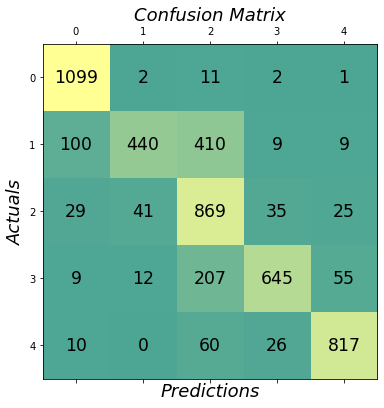

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 

# Calculate the confusion matrix_1
# print(y_test_1)
# print(y_pred_1)
print(len(y_test_1))
print(len(y_pred_1))
conf_matrix = confusion_matrix(y_test_1,y_pred_1)

#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 8))
ax.matshow(conf_matrix, cmap=plt.cm.summer, alpha=0.7)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18,fontstyle="italic")
plt.ylabel('Actuals', fontsize=18,fontstyle="italic")
plt.title('Confusion Matrix', fontsize=18,fontstyle="italic")
plt.show()


In [12]:
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN =conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# f1-score 
F1 = 2 * (PPV * TPR) / (PPV + TPR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Sensitivity",TPR)
print("Specificity",TNR)
print("Precision or Positive Predictive Values",PPV)
print("Negative predictive values",NPV)
print("False Positive or Fall Out",FPR)
print("False Negative Rate",FNR)
print("False discovery Rate",FDR)
print("Accuracy",ACC)
print("f1score",F1)

Sensitivity [0.98565022 0.45454545 0.86986987 0.6950431  0.89485214]
Specificity [0.96113445 0.98609355 0.82466871 0.98197747 0.97755611]
Precision or Positive Predictive Values [0.88131516 0.88888889 0.5581246  0.89958159 0.90077178]
Negative predictive values [0.99564744 0.88075881 0.96137849 0.93271517 0.97609562]
False Positive or Fall Out [0.03886555 0.01390645 0.17533129 0.01802253 0.02244389]
False Negative Rate [0.01434978 0.54545455 0.13013013 0.3049569  0.10514786]
False discovery Rate [0.11868484 0.11111111 0.4418754  0.10041841 0.09922822]
Accuracy [0.96668698 0.88157627 0.83384115 0.9278895  0.96221816]
f1score [0.93056732 0.60150376 0.6799687  0.78419453 0.8978022 ]


In [13]:
accuracy = accuracy_score(y_test_1, y_pred_1)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 78.6% 


In [14]:
F1 = 2 * (PPV * TPR) / (PPV + TPR)

ROC AUC score: 0.8631391081109718


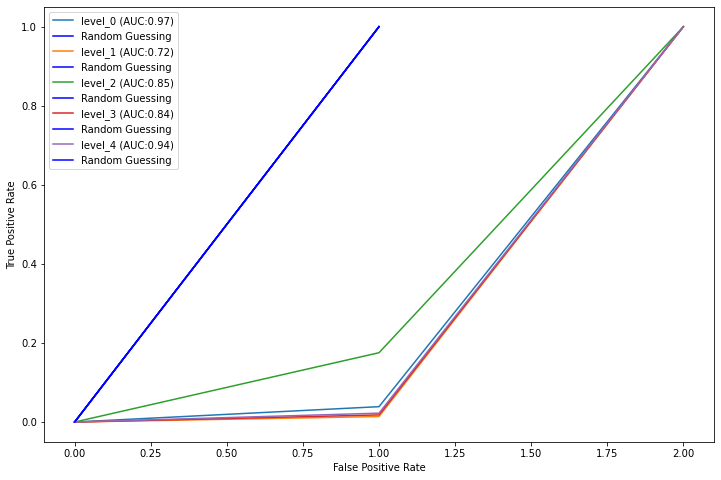

In [17]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

data = "/content/drive/MyDrive/eyepacs_aug_test_data/data"
target= ['level_0', 'level_1', 'level_2', 'level_3', 'level_4']

# set plot figure siz
fig,  conf_matrix = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds =roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        conf_matrix.plot(fpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        conf_matrix.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test_1, y_pred_1))

conf_matrix.legend()
conf_matrix.set_xlabel('False Positive Rate')
conf_matrix.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
# sensitivity=[0.99910314, 0.82438017, 0.70570571, 0.8125,0.84556407]
# Specificity= [0.88602941, 0.9630847,  0.96151886, 0.99073842, 0.99700748]
# Precision= [0.71963824, 0.84533898, 0.82359813, 0.95322377, 0.98469388]
# Negative_predictive_rate = [0.9997037,  0.9572757,  0.92771084, 0.95788964, 0.9659338]
# FalsePositive =[0.11397059, 0.0369153,  0.03848114, 0.00926158, 0.00299252]
# FalseNegative_Rate =[0.00089686, 0.17561983, 0.29429429, 0.1875,     0.15443593]
# Falsediscovery_Rate= [0.28036176, 0.15466102, 0.17640187, 0.04677623, 0.01530612]
# Accuracy =[0.91163924, 0.9358115,  0.90960796, 0.95713996, 0.96892139]

In [ ]:
# sensitivity=[0.99910314, 0.82438017, 0.70570571, 0.8125,0.84556407]
# b=0
# c=0
# for i in range (5):
#   b=b+sensitivity[i]
#   #print(b)
# print(b)
# c=b/5
# print("sensitivity is :" c)

In [ ]:
# Specificity= [0.88602941, 0.9630847,  0.96151886, 0.99073842, 0.99700748]
# b=0
# c=0
# for i in range (5):
#   b=b+Specificity[i]
#   #print(b)
# print(b)
# c=b/5
# print("Specificity is :" c)

In [ ]:
# Precision= [0.71963824, 0.84533898, 0.82359813, 0.95322377, 0.98469388]
# b=0
# c=0
# for i in range (5):
#   b=b+Precision[i]
#   #print(b)
# print(b)
# c=b/5
# print("Precision is :" c)

In [ ]:
# Accuracy =[0.91163924, 0.9358115,  0.90960796, 0.95713996, 0.96892139]
# b=0
# c=0
# for i in range (5):
#   b=b+Accuracy[i]
#   #print(b)
# print(b)
# c=b/5
# print("Accuracy is :" c)

In [11]:
# import matplotlib.pyplot as plt 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score


# target= ['level_0', 'level_1', 'level_2', 'level_3', 'level_4']

# # set plot figure size
# fig, conf_matrix = plt.subplots(1,1, figsize = (12, 8))

# # function for scoring roc auc score for multi-class
# def multiclass_roc_auc_score(y_test_1, y_pred_1, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_test)
#     y_test = lb.transform(y_test_1)
#     y_pred = lb.transform(y_pred_1)

#     for (idx, c_label) in enumerate(target):
#         fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int))
#         conf_matrix.plot(fpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
#         conf_matrix.plot(fpr, fpr, 'b-', label = 'Random Guessing'% (c_label, auc(fpr, tpr)))
#     return roc_auc_score(y_test, y_pred, average=average)


# print('ROC AUC score:', multiclass_roc_auc_score(ds_eye.classes,y_pred_1))

# c_ax.legend()
# c_ax.set_xlabel('False Positive Rate')
# c_ax.set_ylabel('True Positive Rate')
# plt.show()